# HUK Challenge

In [383]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.preprocessing as sk_preprocess
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats


In [384]:
pd_risk_data = pd.read_csv("riskmodel.csv")

## Data Overview

In [385]:
pd_risk_data.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1,1,0.10,D,5,0,55,50,B12,Regular,1217,R82,0.0
1,3,1,0.77,D,5,0,55,50,B12,Regular,1217,R82,0.0
2,5,1,0.75,B,6,2,52,50,B12,Diesel,54,R22,0.0
3,10,1,0.09,B,7,0,46,50,B12,Diesel,76,R72,0.0
4,11,1,0.84,B,7,0,46,50,B12,Diesel,76,R72,0.0


### Fehlende Werte

In [386]:
nan_in_df = pd_risk_data.isnull().values.any()
print (nan_in_df)

False


==> keine fehlende Werte im Datensatz

### Übersicht

In [387]:
pd_risk_data.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,6.780130e+05
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405,8.835998e+01
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564,5.822454e+03
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000e+00
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000e+00
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000e+00
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000e+00
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,4.075401e+06


|Feature| Highest Quartile | Maximum Value | First Assumption | Variablen Typ |
|:---:|:---:|:---:|:---:|:---:|
|ClaimNb|0.00 |16.00 | Die allermeisten Policen haben keinen Claim. Möglicher Outlier 16 | unabhängig | 
|VehPower|7.00|15.00| Die allermeisten Policen haben bis zu 7 Vehpower | unabhängig | 
|VehAge |11.00 |100.00| Möglicher Outlier mit 100 | unabhängig | 
|DrivAge |55.00 |100.00| Möglicher Outlier mit 100 | unabhängig | 
|BonusMalus |64.00|230.00| Möglicher Outlier mit 230 | unabhängig | 
|Density |1658.00.00|27000.00| Möglicher Outlier mit 27000.00 | unabhängig | 
|ClaimAmount |0.000000e+00| 4.075401e+06 |  Die allermeisten Police haben 0.0 ClaimAmount. Outlier mit 4.075401e+06 | abhängig | 
|Exposure|0.99|2.01 | Die allermeisten Policen haben eine Exposure bis ein Jahr. Möglicher Outlier 2.01| abhängig |

### Visualisierung und Untersuchung Exposure

<AxesSubplot: xlabel='Exposure'>

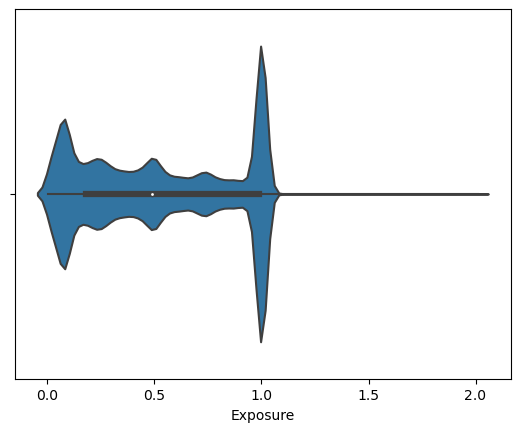

In [388]:
sn.violinplot(x=pd_risk_data.loc[:, "Exposure"])

Es sind Ausreißer vorhanden. Die Verteilung ist links stark gestaucht.

Anzahl aller Instanzen:

<AxesSubplot: xlabel='Exposure'>

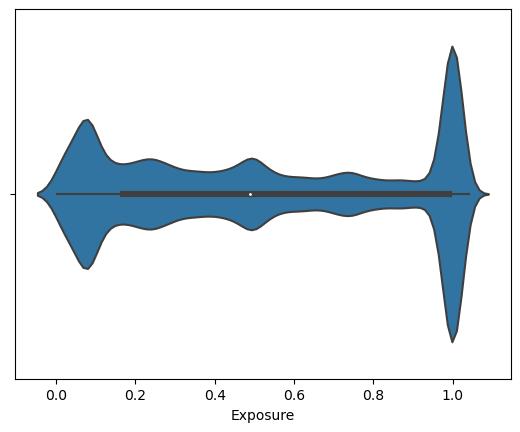

In [214]:
sn.violinplot(x=pd_risk_data.loc[pd_risk_data["Exposure"]< 1.05 , "Exposure"])

In [215]:
pd_risk_data.loc[ pd_risk_data["Exposure"] > 1.05 , "ClaimAmount"].sum()

34228.740000000005

In [216]:
pd_risk_data.loc[ pd_risk_data["Exposure"] > 1.05 , "ClaimAmount"].count()

571

Ich habe aufgrund der geringe Anzalh der Claims und der mit diesen verbundenen ebenso geringen ClaimAmount, die diese Outlier zu entfernen. Allerdings sind immer noch zwei Moden vorhanden, die ich noch untersuchen werden.

In [217]:
pd_risk_data = pd_risk_data.loc[ pd_risk_data["Exposure"] <= 1.05,:]

### Visualisierung und Untersuchung ClaimAmout

<AxesSubplot: xlabel='ClaimAmount'>

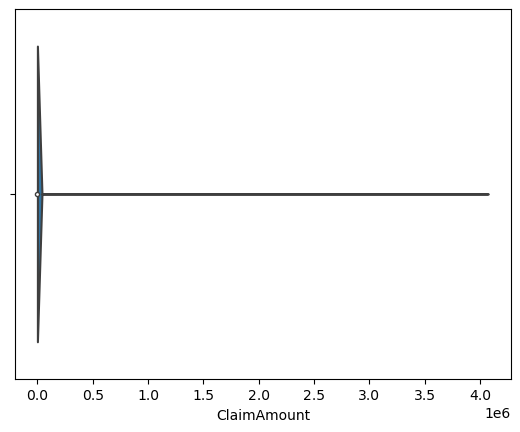

In [389]:
sn.violinplot(x=pd_risk_data.loc[:, "ClaimAmount"])

### Histogramme

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13472\460577554.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd_risk_data.hist(ax=ax)


array([[<AxesSubplot: title={'center': 'IDpol'}>,
        <AxesSubplot: title={'center': 'ClaimNb'}>,
        <AxesSubplot: title={'center': 'Exposure'}>],
       [<AxesSubplot: title={'center': 'VehPower'}>,
        <AxesSubplot: title={'center': 'VehAge'}>,
        <AxesSubplot: title={'center': 'DrivAge'}>],
       [<AxesSubplot: title={'center': 'BonusMalus'}>,
        <AxesSubplot: title={'center': 'Density'}>,
        <AxesSubplot: title={'center': 'ClaimAmount'}>]], dtype=object)

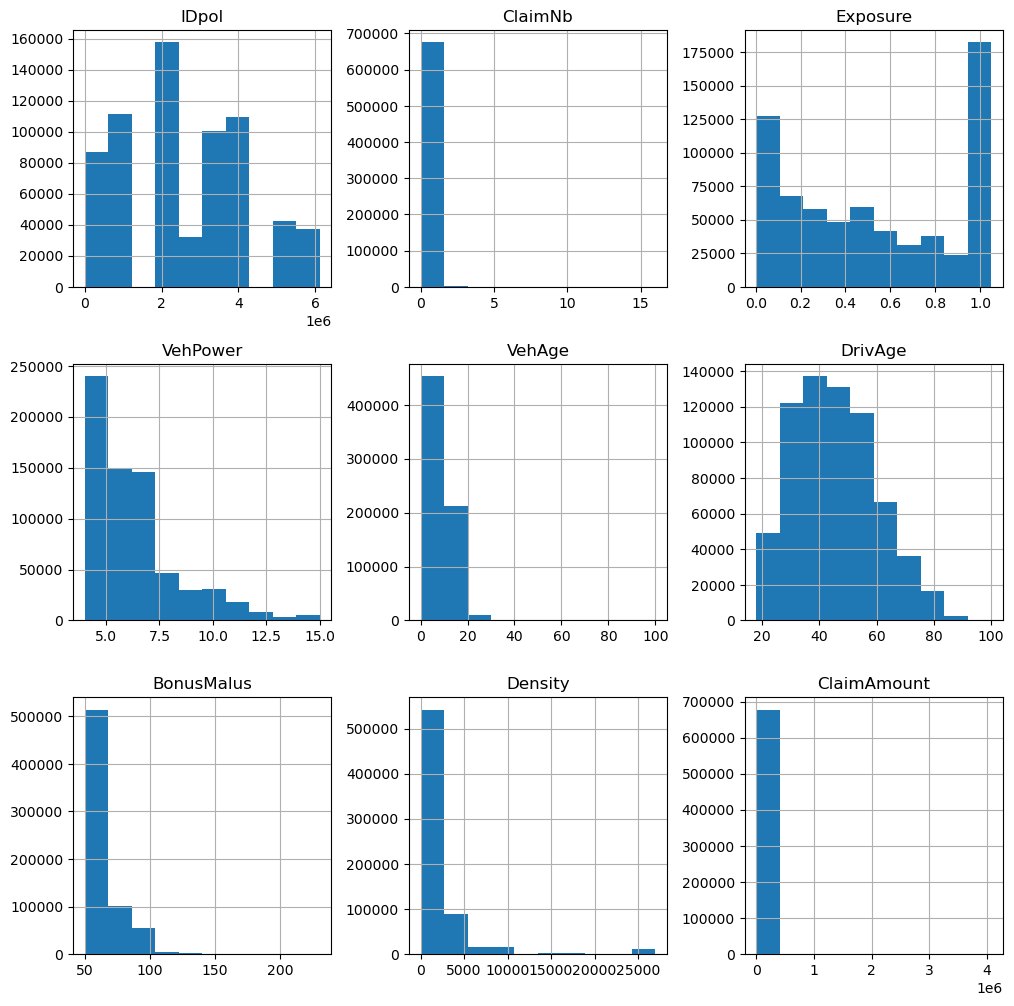

In [218]:
fig, ax = plt.subplots(figsize=(12,12))
pd_risk_data.hist(ax=ax)

|Variable| Beobachtung der Verteilung |
|:---:|:---:|
|ClaimNb|Skewed|
|Exposure| Zwei Moden (2 Populationen?)|
|VehPower|Skewed |
|VehAge|Skewed|
|DrivAge|Skewed|
|BonusMalus|Skewed|
|VehBrand|Skewed|
|VehGas|Skewed|
|Density|Skewed|
|ClaimAmount|Skewed|

### Aufteilung von Exposure zur Untersuchung

<AxesSubplot: >

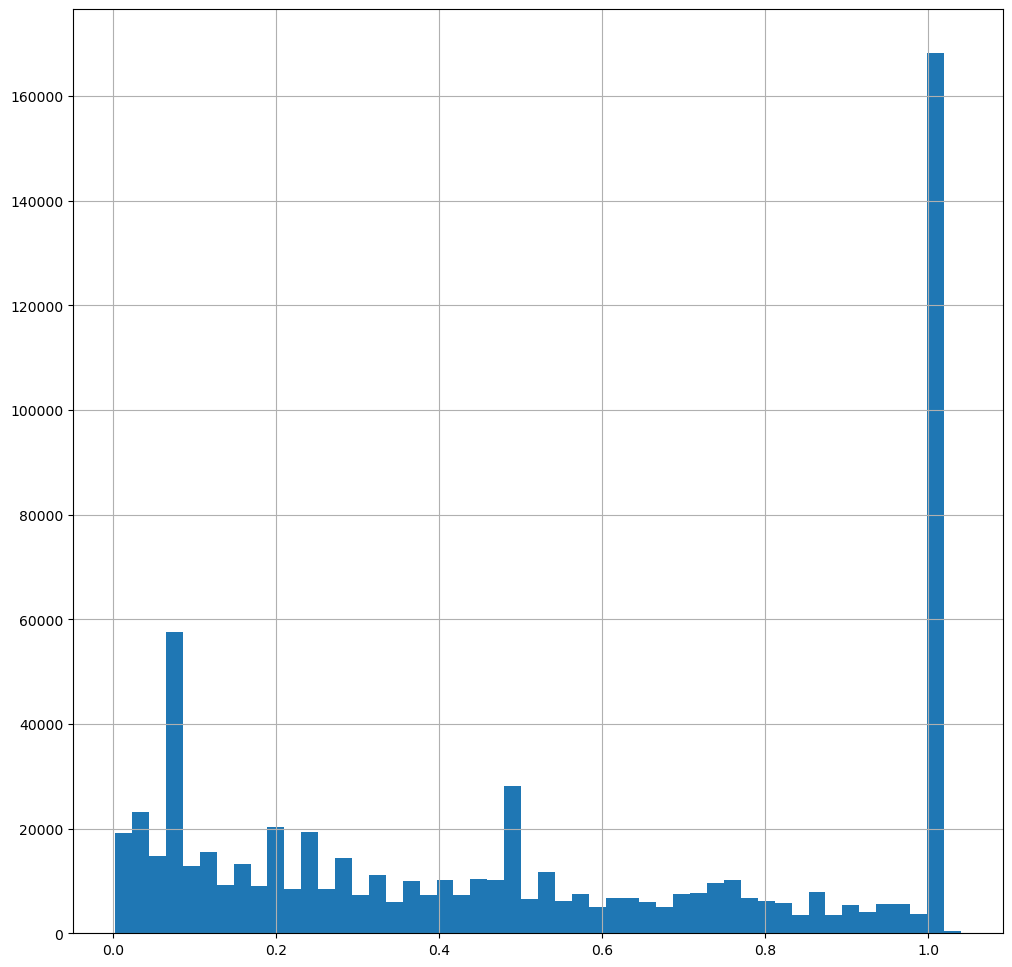

In [219]:
fig, ax = plt.subplots(figsize=(12,12))
pd_risk_data_target["Exposure"].hist(ax=ax, bins = 50)

In [220]:
pd_risk_data.loc[pd_risk_data["Exposure"] >= 0.95,"Exposure"].count()

182195

In [221]:
pd_risk_data_target.loc[pd_risk_data_target["Exposure"] < 0.95,"Exposure"].count()

494246

In [248]:
pd_risk_data_target_low_exp = pd_risk_data_target.loc[pd_risk_data_target["Exposure"] < 0.95,:].copy()

In [249]:
pd_risk_data_target_high_exp = pd_risk_data_target.loc[pd_risk_data_target["Exposure"] >= 0.95,:].copy()

In [250]:
pd_risk_data_target_low_exp["Exposure"].count()

494246

In [251]:
pd_risk_data_target_low_exp.loc[:, "ClaimAmount"].sum()

17844087.15

In [252]:
pd_risk_data_target_low_exp["target"] = pd_risk_data_target_low_exp["ClaimAmount"] / pd_risk_data_target_low_exp["Exposure"]
pd_risk_data_target_low_exp['target'] = pd_risk_data_target_low_exp.loc[:, 'target'].fillna(0.0).copy()

In [271]:
nan_in_df = pd_risk_data_target_low_exp.isnull().values.any()
print (nan_in_df)

False


### Exposure kleiner 0.95

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13472\986951621.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd_risk_data_target_low_exp.hist(ax=ax)


array([[<AxesSubplot: title={'center': 'IDpol'}>,
        <AxesSubplot: title={'center': 'ClaimNb'}>,
        <AxesSubplot: title={'center': 'Exposure'}>],
       [<AxesSubplot: title={'center': 'VehPower'}>,
        <AxesSubplot: title={'center': 'VehAge'}>,
        <AxesSubplot: title={'center': 'DrivAge'}>],
       [<AxesSubplot: title={'center': 'BonusMalus'}>,
        <AxesSubplot: title={'center': 'Density'}>,
        <AxesSubplot: title={'center': 'ClaimAmount'}>],
       [<AxesSubplot: title={'center': 'target'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

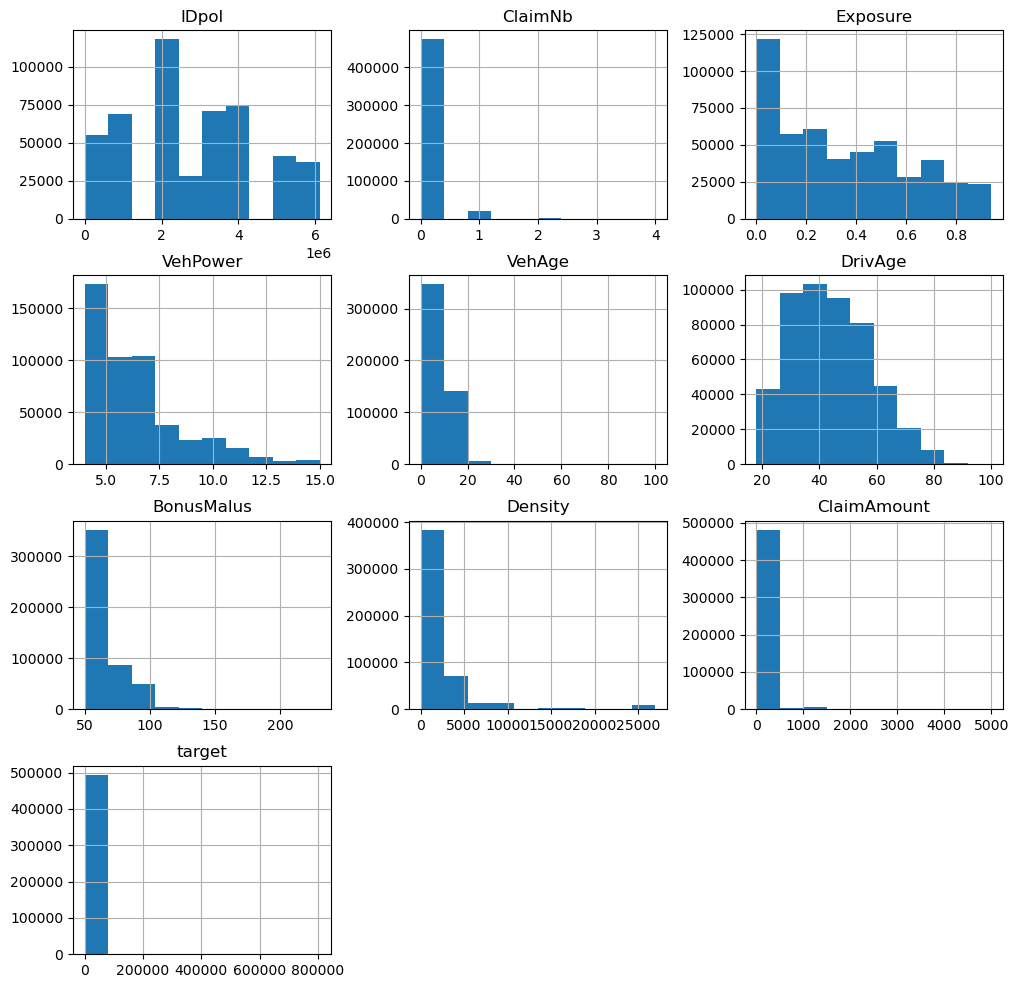

In [272]:
fig, ax = plt.subplots(figsize=(12,12))
pd_risk_data_target_low_exp.hist(ax=ax)

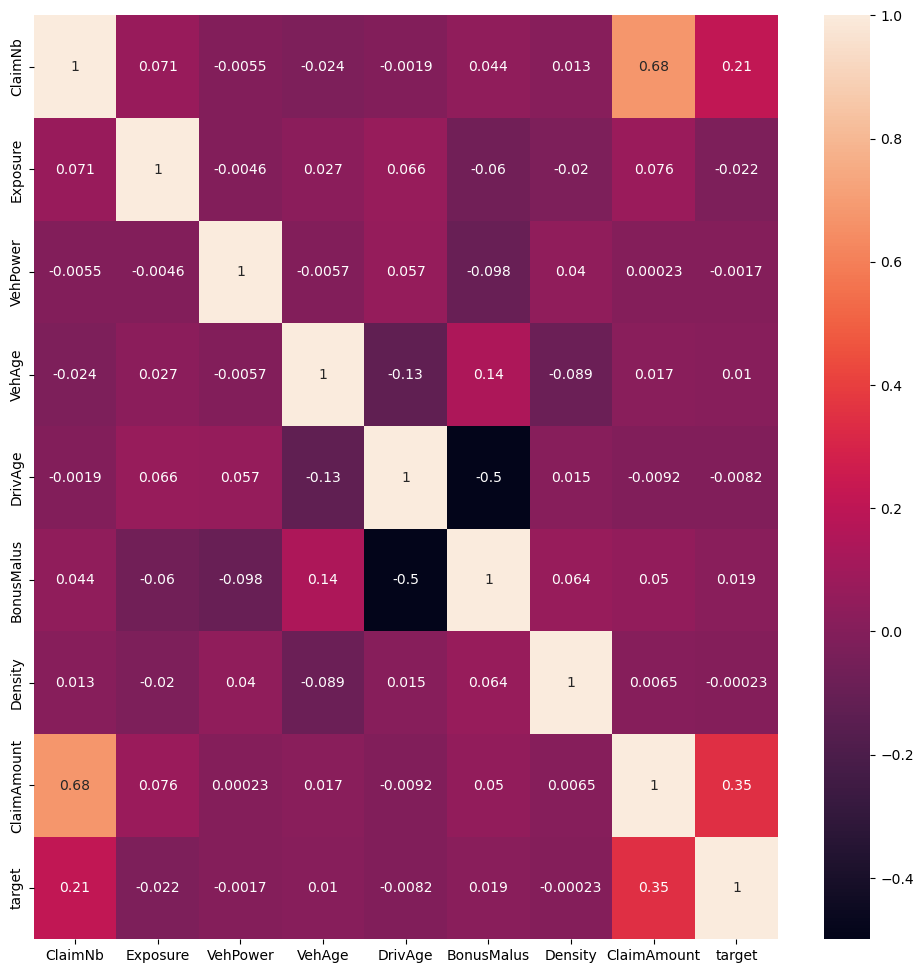

In [254]:
fig, ax = plt.subplots(figsize=(12,12))
corr_matrix = pd_risk_data_target_low_exp.loc[:,["ClaimNb", "Exposure", "VehPower", "VehAge", "DrivAge", "BonusMalus", "Density", "ClaimAmount", "target"]].corr()
sn.heatmap(corr_matrix, annot=True, ax=ax)
plt.show()

|Variable| Korrelation mit Target|
|:---:|:---:|
|ClaimNb| klein|
|Exposure| sehr klein |
|VehPower|sehr klein  |
|VehAge|sehr klein |
|DrivAge|sehr klein |
|BonusMalus|sehr klein |
|VehBrand|sehr klein |
|VehGas|sehr klein |
|Density|sehr klein|


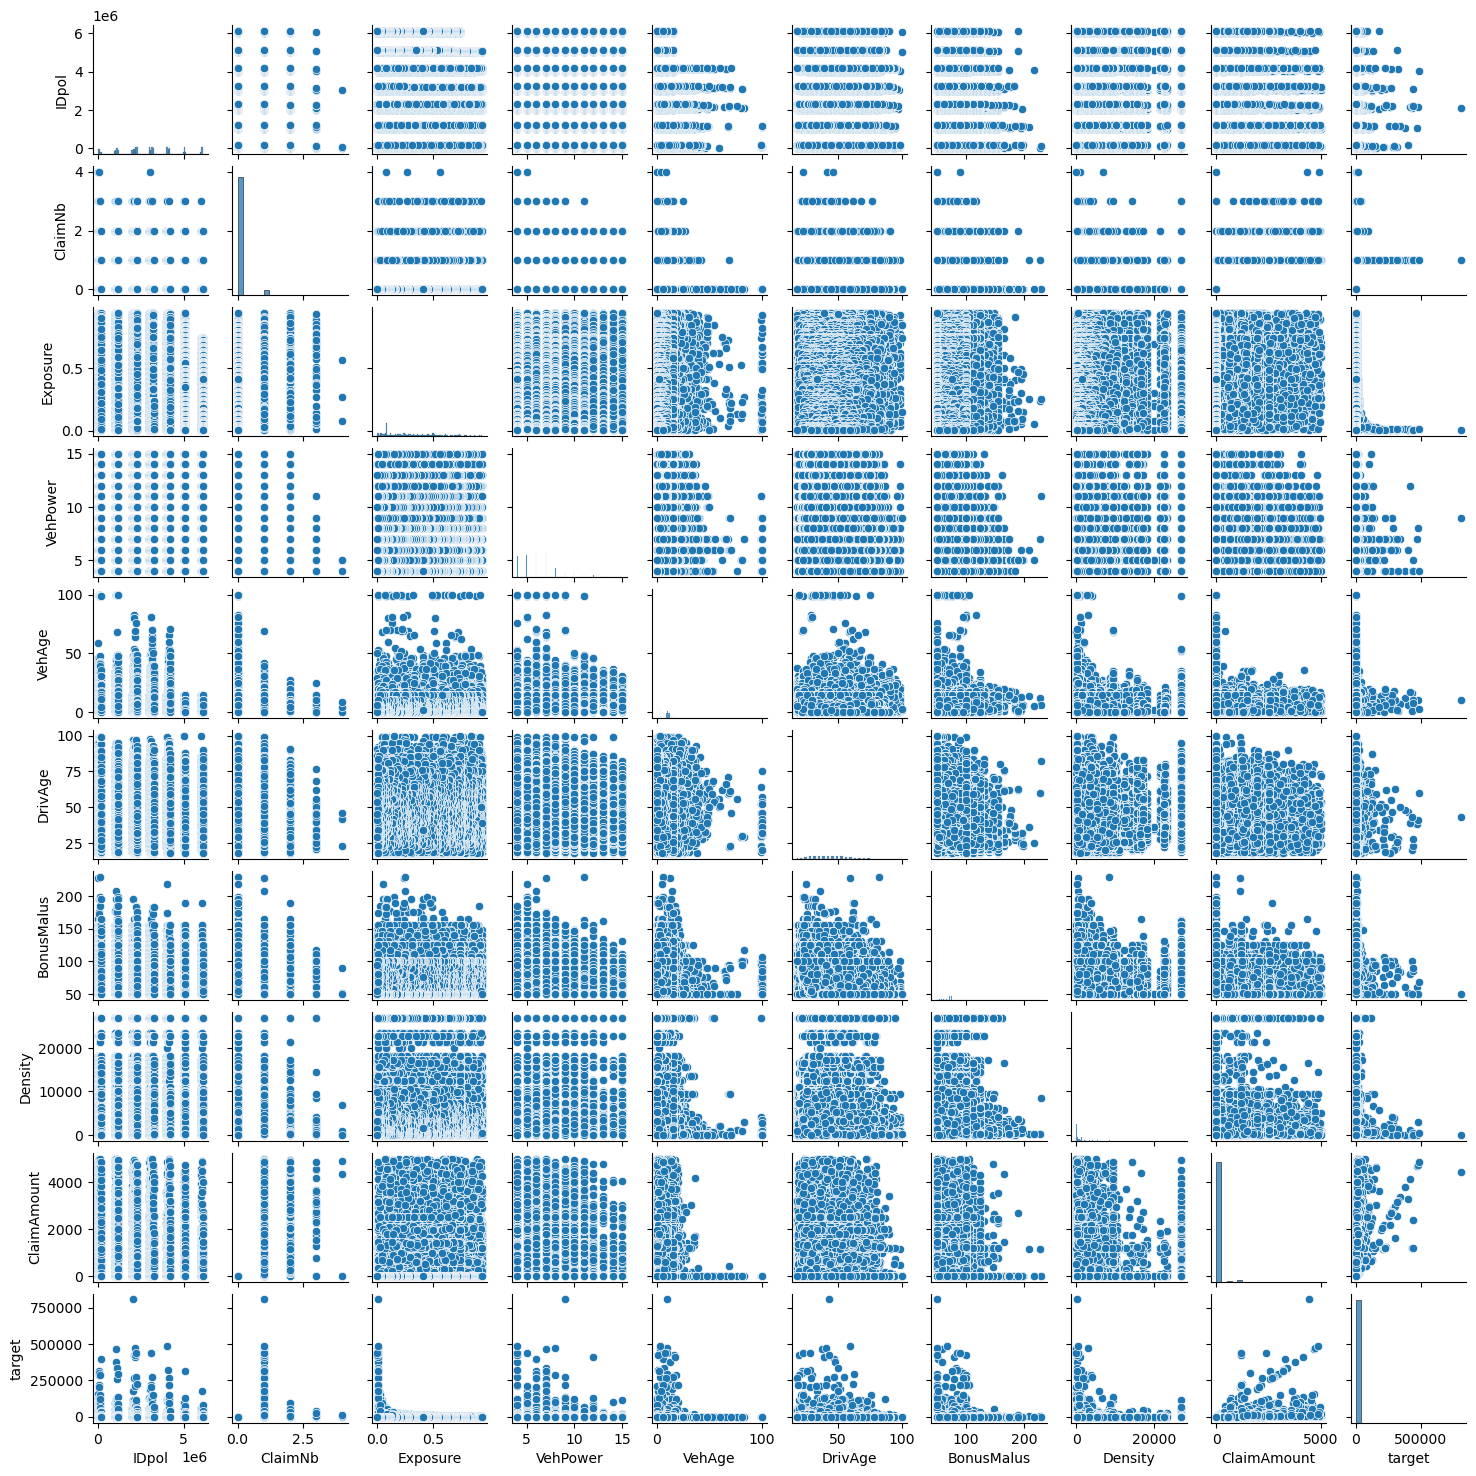

In [263]:
sn.pairplot(pd_risk_data_target_low_exp, height=1.5)

### Exposure größer als 0.95

In [264]:
pd_risk_data_target_high_exp["Exposure"].count()

181888

In [265]:
pd_risk_data_target_high_exp.loc[:, "ClaimAmount"].sum()

10536466.249999998

In [266]:
pd_risk_data_target_high_exp["target"] = pd_risk_data_target_high_exp["ClaimAmount"] / pd_risk_data_target_high_exp["Exposure"]
pd_risk_data_target_high_exp['target'] = pd_risk_data_target_high_exp.loc[:, 'target'].fillna(0.0).copy()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13472\3345965312.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd_risk_data_target_high_exp.hist(ax=ax)


array([[<AxesSubplot: title={'center': 'IDpol'}>,
        <AxesSubplot: title={'center': 'ClaimNb'}>,
        <AxesSubplot: title={'center': 'Exposure'}>],
       [<AxesSubplot: title={'center': 'VehPower'}>,
        <AxesSubplot: title={'center': 'VehAge'}>,
        <AxesSubplot: title={'center': 'DrivAge'}>],
       [<AxesSubplot: title={'center': 'BonusMalus'}>,
        <AxesSubplot: title={'center': 'Density'}>,
        <AxesSubplot: title={'center': 'ClaimAmount'}>],
       [<AxesSubplot: title={'center': 'target'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

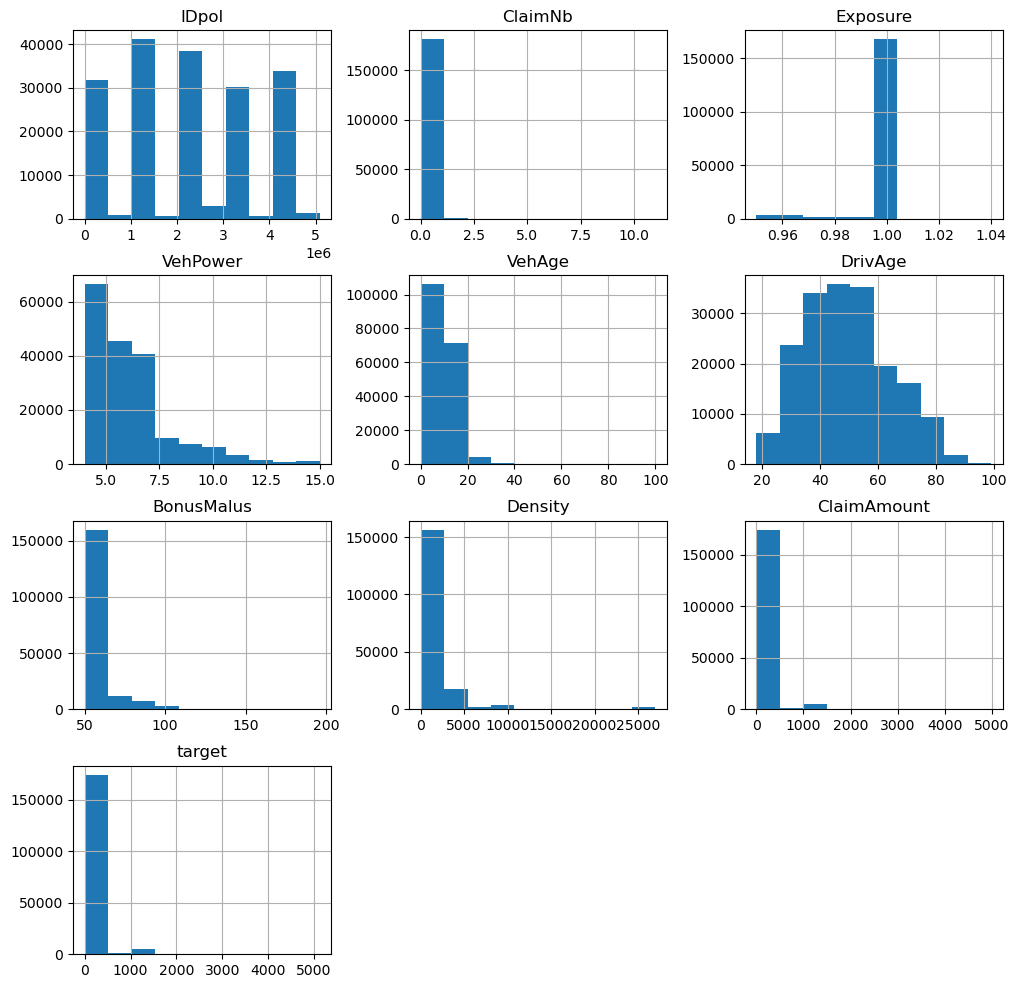

In [267]:
fig, ax = plt.subplots(figsize=(12,12))
pd_risk_data_target_high_exp.hist(ax=ax)

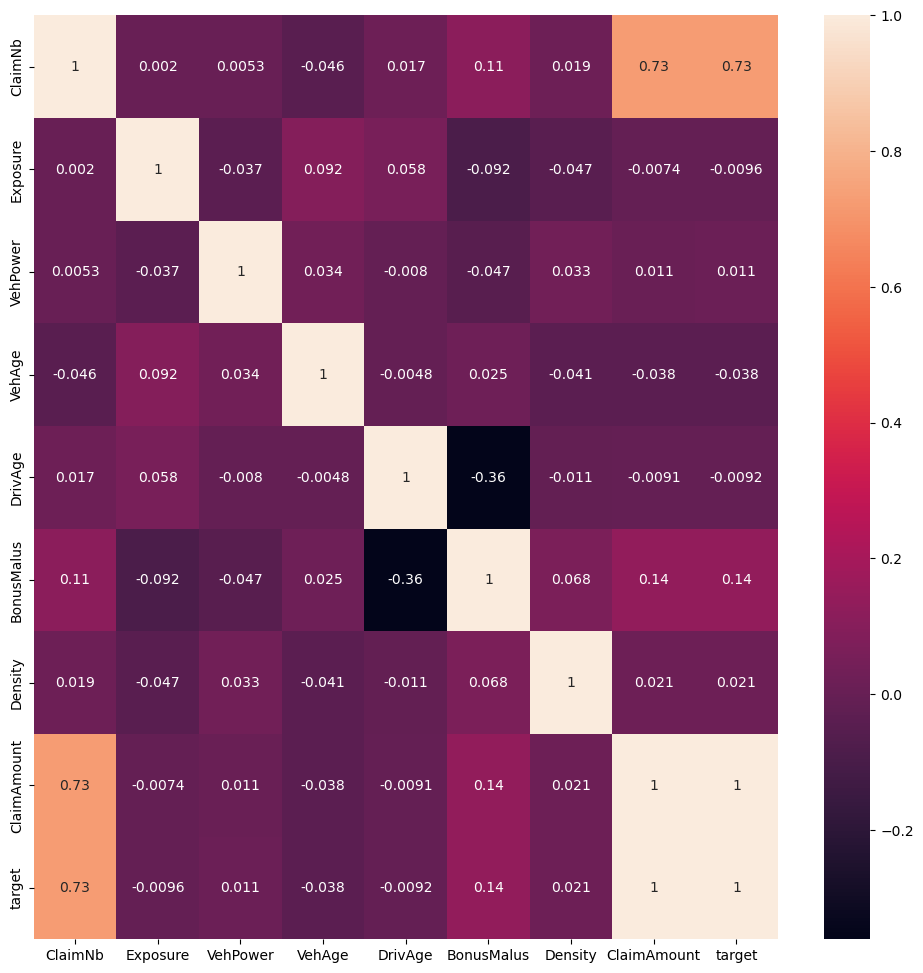

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
corr_matrix = pd_risk_data_target_high_exp.loc[:,["ClaimNb", "Exposure", "VehPower", "VehAge", "DrivAge", "BonusMalus", "Density", "ClaimAmount", "target"]].corr()
sn.heatmap(corr_matrix, annot=True, ax=ax)
plt.show()

|Variable| Korrelation mit Target|
|:---:|:---:|
|ClaimNb| stark|
|Exposure| sehr klein |
|VehPower|sehr klein  |
|VehAge|sehr klein |
|DrivAge|sehr klein |
|BonusMalus| klein |
|VehBrand|sehr klein |
|VehGas|sehr klein |
|Density|sehr klein|

In [270]:
nan_in_df = pd_risk_data_target_high_exp.isnull().values.any()
print (nan_in_df)

False


In [314]:
pd_risk_data_target_low_exp.columns

Index(['IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region', 'ClaimAmount',
       'target', 'area_enc', 'vehbrand_enc', 'vehgas_enc', 'region_enc'],
      dtype='object')

### Summary

Anfangs plante ich eine Linear Regression zu verwenden. Allerdings sind die Verteilungen der Variablen strak verschoben (skewed) und sind einige Outlier vorhanden. Deshalb schwenke ich auf kNN um, welches nicht auf iid bei den Verteilungen angewiesen. Bei der Zielvariable Target fällt auf, dass sehr viele Wert Null sind, deshalb werde ich bei der Aufteilung der Daten (Trainings- und Testdaten) die Daten stratifizieren.

## Machine Learning

### Encoding < 0.95 Exposure

In [379]:
area_encoder_low_exp = sk_preprocess.LabelEncoder()
vehbrand_encoder_low_exp = sk_preprocess.LabelEncoder()
vehgas_encoder_low_exp = sk_preprocess.LabelEncoder()
region_encoder_low_exp = sk_preprocess.LabelEncoder()
area_encoder_low_exp.fit(pd_risk_data_target_low_exp["Area"])
vehbrand_encoder_low_exp.fit(pd_risk_data_target_low_exp["VehBrand"])
vehgas_encoder_low_exp.fit(pd_risk_data_target_low_exp["VehGas"])
region_encoder_low_exp.fit(pd_risk_data_target_low_exp["Region"])

LabelEncoder()

In [275]:
pd_risk_data_target_low_exp["area_enc"] = area_encoder_low_exp.transform(pd_risk_data_target_low_exp["Area"])
pd_risk_data_target_low_exp["vehbrand_enc"] = vehbrand_encoder_low_exp.transform(pd_risk_data_target_low_exp["VehBrand"])
pd_risk_data_target_low_exp["vehgas_enc"] = vehgas_encoder_low_exp.transform(pd_risk_data_target_low_exp["VehGas"])
pd_risk_data_target_low_exp["region_enc"] = region_encoder_low_exp.transform(pd_risk_data_target_low_exp["Region"])

## Aufteilung der Daten < 0.95 Exposure

In [277]:
pd_risk_data_target_low_exp_X_y = pd_risk_data_target_low_exp.loc[:,['ClaimNb', 'area_enc', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'vehbrand_enc', 'vehgas_enc', 'Density', 'region_enc', 'target', 'Exposure', 'ClaimAmount' ]]

In [279]:
columns = ['ClaimNb', 'area_enc', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'vehbrand_enc', 'vehgas_enc', 'Density', 'region_enc', 'target']

In [280]:
data_low_exp_X_y = pd_risk_data_target_low_exp.loc[:, columns]

In [283]:
data_low_exp_X_y["label"] = 0.0
data_low_exp_X_y.loc[data_low_exp_X_y['target'] > 0.0, "label"] = 1.0

In [285]:
data_low_exp_X_y.loc[data_low_exp_X_y['target'] == 0.0, "label"].count()

479939

In [289]:
data_low_exp_X_y.loc[data_low_exp_X_y['target'] > 0.0, "label"].count()

14307

In [290]:
X_train_low_exp, X_test_low_exp, y_train_low_exp, y_test_low_exp = train_test_split(data_low_exp_X_y.loc[:,[ 'ClaimNb', 'area_enc', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'vehbrand_enc', 'vehgas_enc', 'Density', 'region_enc']], data_low_exp_X_y.loc[:,['target']], test_size=0.15, random_state=42, stratify=data_low_exp_X_y["label"])

In [ ]:
## Skalierung < 0.95 Exposure

In [300]:
scaler_low_exp = sk_preprocess.StandardScaler().fit(X_train_low_exp)

In [301]:
X_train_scaled_low_exp = scaler_low_exp.transform(X_train_low_exp)

## Training < 0.95 Exposure

In [302]:
knn_reg_low_exp_scaled = KNeighborsRegressor(n_neighbors=5)
knn_reg_low_exp_scaled.fit(X_train_scaled_low_exp, y_train_low_exp)

KNeighborsRegressor()

## Inference auf Testdaten < 0.95 Exposure

In [307]:
X_test_low_exp_scaled = scaler_low_exp.transform(X_test_low_exp)

In [310]:
pred_low_exp_values_scaled = knn_reg_low_exp_scaled.predict(X_test_low_exp_scaled)

In [356]:
mean_absolute_error_low_exp_values_scaled = mean_absolute_error(pred_low_exp_values_scaled, y_test_low_exp)
mean_absolute_error_low_exp_values_scaled

209.60113016730205

<AxesSubplot: >

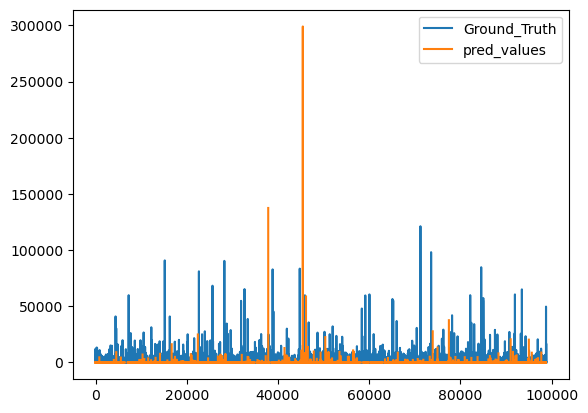

In [313]:
pd_df_scaled = pd.DataFrame(pred_low_exp_values_scaled)
pd_df_scaled.columns = ["Ground_Truth"]
pd_df_scaled["pred_values"] = y_test_low_exp
pd_df_scaled.plot()

## Encoding >= 0.95 Exposure

In [315]:
area_encoder_high_exp = sk_preprocess.LabelEncoder()
vehbrand_encoder_high_exp = sk_preprocess.LabelEncoder()
vehgas_encoder_high_exp = sk_preprocess.LabelEncoder()
region_encoder_high_exp = sk_preprocess.LabelEncoder()
area_encoder_high_exp.fit(pd_risk_data_target_high_exp["Area"])
vehbrand_encoder_high_exp.fit(pd_risk_data_target_high_exp["VehBrand"])
vehgas_encoder_high_exp.fit(pd_risk_data_target_high_exp["VehGas"])
region_encoder_high_exp.fit(pd_risk_data_target_high_exp["Region"])

LabelEncoder()

In [316]:
pd_risk_data_target_high_exp["area_enc"] = area_encoder_high_exp.transform(pd_risk_data_target_high_exp["Area"])
pd_risk_data_target_high_exp["vehbrand_enc"] = vehbrand_encoder_high_exp.transform(pd_risk_data_target_high_exp["VehBrand"])
pd_risk_data_target_high_exp["vehgas_enc"] = vehgas_encoder_high_exp.transform(pd_risk_data_target_high_exp["VehGas"])
pd_risk_data_target_high_exp["region_enc"] = region_encoder_high_exp.transform(pd_risk_data_target_high_exp["Region"])

In [322]:
data_high_exp_X_y = pd_risk_data_target_high_exp.loc[:, columns]

## Aufteilung der Daten >= 0.95 Exposure

In [323]:
data_high_exp_X_y["label"] = 0.0
data_high_exp_X_y.loc[data_high_exp_X_y['target'] > 0.0, "label"] = 1.0

In [324]:
X_train_high_exp, X_test_high_exp, y_train_high_exp, y_test_high_exp = train_test_split(data_high_exp_X_y.loc[:,[ 'ClaimNb', 'area_enc', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'vehbrand_enc', 'vehgas_enc', 'Density', 'region_enc']], data_high_exp_X_y.loc[:,['target']], test_size=0.15, random_state=42, stratify=data_high_exp_X_y["label"])

In [325]:
scaler_high_exp = sk_preprocess.StandardScaler().fit(X_train_high_exp)

In [326]:
X_train_scaled_high_exp = scaler_high_exp.transform(X_train_high_exp)

## Training >= 0.95 Exposure

In [327]:
knn_reg_high_exp_scaled = KNeighborsRegressor(n_neighbors=5)
knn_reg_high_exp_scaled.fit(X_train_scaled_high_exp, y_train_high_exp)

KNeighborsRegressor()

## Inference auf Testdaten > 0.95 Exposure

In [374]:
X_test_high_exp_scaled = scaler_high_exp.transform(X_test_high_exp)

In [375]:
pred_high_exp_values_scaled = knn_reg_high_exp_scaled.predict(X_test_high_exp_scaled)

In [376]:
mean_absolute_error_high_exp_values_scaled =  mean_absolute_error(pred_high_exp_values_scaled, y_test_high_exp)
mean_absolute_error_high_exp_values_scaled

40.213571125717685

<AxesSubplot: >

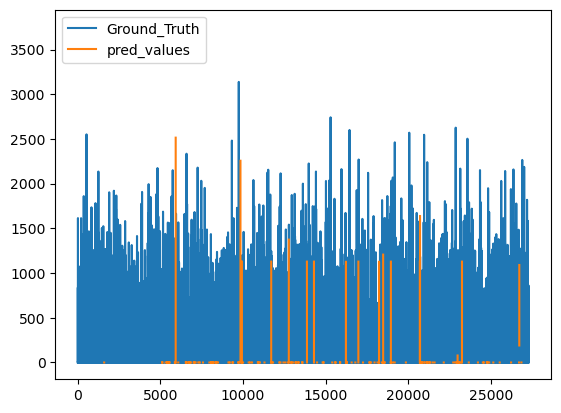

In [377]:
pd_df_scaled = pd.DataFrame(pred_high_exp_values_scaled)
pd_df_scaled.columns = ["Ground_Truth"]
pd_df_scaled["pred_values"] = y_test_high_exp
pd_df_scaled.plot()

## Encoding alle Daten¶

In [332]:
pd_risk_data
pd_risk_data_target["target"] = pd_risk_data["ClaimAmount"] / pd_risk_data["Exposure"]
pd_risk_data_target['target'] = pd_risk_data_target.loc[:, 'target'].fillna(0.0).copy()

In [336]:
area_encoder = sk_preprocess.LabelEncoder()
vehbrand_encoder = sk_preprocess.LabelEncoder()
vehgas_encoder = sk_preprocess.LabelEncoder()
region_encoder = sk_preprocess.LabelEncoder()
area_encoder.fit(pd_risk_data_target["Area"])
vehbrand_encoder.fit(pd_risk_data_target["VehBrand"])
vehgas_encoder.fit(pd_risk_data_target["VehGas"])
region_encoder.fit(pd_risk_data_target["Region"])

LabelEncoder()

In [338]:
pd_risk_data_target["area_enc"] = area_encoder.transform(pd_risk_data_target["Area"])
pd_risk_data_target["vehbrand_enc"] = vehbrand_encoder.transform(pd_risk_data_target["VehBrand"])
pd_risk_data_target["vehgas_enc"] = vehgas_encoder.transform(pd_risk_data_target["VehGas"])
pd_risk_data_target["region_enc"] = region_encoder.transform(pd_risk_data_target["Region"])

In [339]:
data_X_y = pd_risk_data_target.loc[:, columns]

## Aufteilung der aller Daten

In [340]:
data_X_y["label"] = 0.0
data_X_y.loc[data_X_y['target'] > 0.0, "label"] = 1.0

In [341]:
X_train, X_test, y_train, y_test = train_test_split(data_X_y.loc[:,[ 'ClaimNb', 'area_enc', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'vehbrand_enc', 'vehgas_enc', 'Density', 'region_enc']], data_X_y.loc[:,['target']], test_size=0.15, random_state=42, stratify=data_X_y["label"])

In [342]:
scaler = sk_preprocess.StandardScaler().fit(X_train)

In [343]:
X_train_scaled = scaler.transform(X_train)

In [344]:
knn_reg_scaled = KNeighborsRegressor(n_neighbors=5)
knn_reg_scaled.fit(X_train_scaled, y_train)

KNeighborsRegressor()

## Inference auf Testdaten > 0.95 Exposure

In [345]:
X_test_scaled = scaler.transform(X_test)

In [346]:
pred_values_scaled = knn_reg_scaled.predict(X_test_scaled)

In [347]:
mean_absolute_error(pred_values_scaled, y_test)

171.00386763518233

<AxesSubplot: >

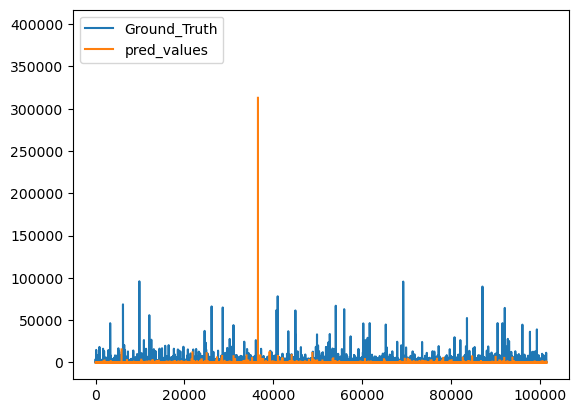

In [348]:
pd_df_scaled = pd.DataFrame(pred_values_scaled)
pd_df_scaled.columns = ["Ground_Truth"]
pd_df_scaled["pred_values"] = y_test
pd_df_scaled.plot()

In [361]:
((mean_absolute_error_low_exp_values_scaled * y_test_low_exp.count()) + (mean_absolute_error_high_exp_values_scaled * y_test_high_exp.count())) / ( y_test_low_exp.count() + y_test_high_exp.count())

target    172.960968
dtype: float64

## Test mit MLP

In [366]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=400, random_state=1)
regr = MLPRegressor(hidden_layer_sizes=(100, 100), random_state=1, max_iter=250).fit(X_train, y_train)

pred_values_mlp = regr.predict(X_test)
regr.score(X_test, y_test)

D:\Users\procy\anaconda3\envs\goldeneye\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.026639083583278933

In [367]:
mean_absolute_error(pred_values_mlp, y_test)

178.49432006012043

<AxesSubplot: >

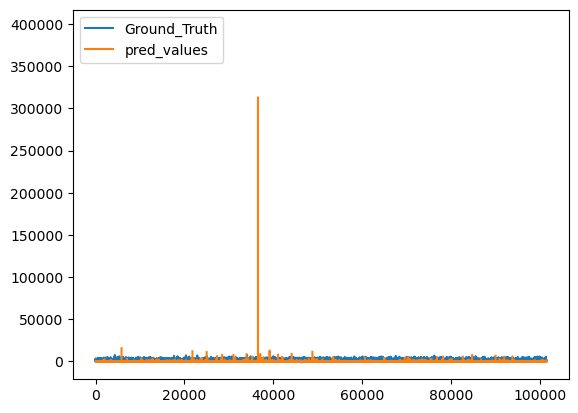

In [373]:
pd_df_scaled = pd.DataFrame(pred_values_mlp)
pd_df_scaled.columns = ["Ground_Truth"]
pd_df_scaled["pred_values"] = y_test
pd_df_scaled.plot()

## Summary 

1. In den Plots der Inferenzergebnisse sind Prediktionen die sehr hoch (siehe Ausreißer im Bild oberhalb). ==> Es sollte noch einmal die Outlier analysiert und behandelt werden
2. kNN und MLP bringen beide ähnliche Ergebniss ==> Business Case erstellen, ob oder ab welcher MAE eines der Modelle verwendet werden kann
3. Für die Modelle muss noch eine Hyperparameter Optimierung durchgeführt werden
4. Es können noch andere Modelle getestet werden
5. Es kann noch einmal vertieft die Daten untersucht werden.